# ACT FTS Field Guide
## Rahul Data, Jeff McMahon, Taylor Baildon

## physical setup in the field

* assemble the FTS and its mount in the high bay, test the source, chopper, etc
* the chpper is 5 Hz (check the exact value and document for reference)  this is set by an aurduino
* the FTS should be tilted to + $24\pm 1^\circ $ in the mount
* carry the mount and the FTS + snout up to the telescope seperately, the FTS is heavy (~50 lbs) but managable
* remove the snout baffle by unscrewing the screws that mount the frame to the wall
* set up the FTS so that the final lens is approximately 5 inches from the window
* run power to the FTS + source + choper via a long extension cord from the outlet near the base of the telescope.  Preiously we found that the large draw of the source (~1kW) was stressing the UPS in the receiver cabin

## setting up the FTS stage

* using the aerotech code zero the encoder using the home button
* move the stage to $x = 74.87 $ to center it prior to peaking up the S/N below

## Computer and readout overview

* there is a dedicated FTS laptop that contains: 
 * code for operating the aerotech stage in the FTS, and 
 * a virtual box linux install that contains Matthew's viewer code that allows us to align the FTS to maximuze S/N in real time
* the data acquisition is handled throug the MCEs.  Their addresses are listed here:
 * MCE1=192.168.1.51
 * MCE2=192.168.1.52
 * MCE3=192.168.1.53
* code on the MCEs demodulates the FTS signal and recordes the raw and demodulated data
 * we do not feed the chopper signal into the MCEs, instead we demodualte both the sine and cosine components at the chop frequency. The sum of the squares of these amplitudes is recorded as the demodulated signal.  This costs a factor of $\sqrt$ in noise, but saves effor in imputing a new signal into the timestreams
* the final analsis of the FTS data is handled in this notebook.

## code for the visualizer
* on MCE3 run mhu_server
* run mhu_random
* on MCEx:/fts python FTS_code_SNR.py
* run mhu_plot_qt on your local machiene

## checking the FTS works
* on MCEx type python stage.py  (this will connect and intialize it)
* can also use python stage.py to move 


## procedural steps once everything is setup

* this asumes you are using the virtual box on the FTS computer, the site computers also work
* set aliases for the MCEs

>MCE1=192.168.1.51

>MCE2=192.168.1.52

>MCE3=192.168.1.53

>FTS = 192.168.1.41

* log into a relevent MCE

>ssh mce@$MCE1

>password:

* set up the detectors

> mce_reset_clean

> auto_setup

> auto_iv

The first command sets up the SQUIDs. it takes 30 seconds.  The second command does an IV curve and rebiasing, and takes a few minutes.  At the end if auto_iv it will print out the number of good detectors, per column. 

DO NOT run these commands while other MCE operations are in progress, including:
 * regular observations
 * running the FTS data acquisition script
 * anything else.

* in seperate terminal windows type: 
 > mhu_random on the mce 
 * (it streams data to the visualizer), then run 
 > mhu_plot_qt 
 * on the local machine (as long as mheadsup is installed on the local machine.  This will should show the snr for the chopped signal in the data for the live detectors, this is realtime output from the SNR script). Make sure you change the geometry on the visualizer to "PHYS."  Once this is done you can adjust the FTS alignment and maximize the S/N before taking an interferogram.
 
* now take an interferogram
 * The code is under the /fts directory on each MCE.  From this directory run:
 > python FTScode_SNR.py --spec -30 30 0.15
  * this example acquires interferograms with stage travel from -30 to +30 mm and step size 0.15 mm.  The integration time is set internally in the code.  The current default is 512 samples (~1.25 seconds) which is a good compromize between time and s/n.
  * In the code "stage.py" 
  > Line 19: TRANSLATE = 1, 74.87 
   * 74.87 refers to the center position of the dihedral mirror, may need to add an offset to this



 * The demodulated interferogram data gets saved as  /fts/data/<ctime>_ar{1,2,3}_spec
* copy the data to the local machine using: 
> scp -r mce@$MCE1:fts/data ./

* analyzie the data on your laptop

## procedure for getting all the FTS data you need

* repeat the above steps with various positions of the FTS
* do low resolution scans with a higher frequency cuttoff: e.g.,
 > python FTScode_SNR.py --spec -4.5 4.5 0.03 -t 512
 * the top frequency for this paramter set is 1000 GHz with 5 GHz resolution
* do high resolution scans with a low frequency cuttoff, e.g.,
 > python FTScode_SNR.py --spec -20 20 0.1 -t 512
  * the top frequency for this paramter set is 375 GHz with ~1.125 GHz resolution
* after the loadig changes or about 2 hours the detectors should be rebiased
* given that the filenames are tied to ctime, take notes!

## procedure for locating the data and getting it to your lapoop

* AR4 pointing 1, high frequency
    1482070808_ar4_spec
* AR4 pointing 1, low frequency high res
    1482071881_ar4_spec
    


## run notes Dec 18, 2016
* HF position 0
 * 1482070808_ar4_spec
   * -4.50 to 4.50 in steps of 0.03
 * 1482083926_ar4_spec
   * -4.50 to 4.50 in steps of 0.02
 * 1482082435_ar4_spec
   * -20.00 to 20.00 in steps of 0.10
 * 1482085201_ar4_spec
   *  -20.00 to 20.00 in steps of 0.10
 * Potential good detectors
   * 985#96 # 505 #   [64,   65,   96,   97,  449,  481,  512,  513,  544,  545,  728, 729,  760,  761,  794,  826,  896,  897,  928,  929,  960,  985,  992, 1017, 1048, 1050, 1080, 1082, 1304, 1306, 1336, 1338]

    * HF: #728,  729,  760,  761,  794,  826,  985, 1017, 1048, 1050, 1080, 1082, 1304, 1306, 1336, 1338


## run notes Dec 20, 2016

* HF position 1 (right side)
 * 1482230319_ar4_spec  <== corrupted by a crash, recoverable, but not recovered yet
  * -20 20 .1 512
  ----
 * 1482231518_ar4_spec
  * -20 20 .1 512
 * 1482233122_ar4_spec
  * -20 20 .1 512
 * 1482234802_ar4_spec
  * -20 20 .1 512
 * 1482236459_ar4_spec
  * -20 20 .1 512
  -----
 * 1482238189_ar4_spec
  * -4.5 4.5 .02 512
 * 1482239986_ar4_spec
  * -4.5 4.5 .02 512
 * 1482241783_ar4_spec
  * -4.5 4.5 .02 512
 * 1482243877_ar4_spec
  * -4.5 4.5 .02 512
  ----
  ----
  ----
* HF position 2 (left side), data are much less good, only a few reasonable channels
 * 1482246583_ar4_spec
  * -20 20 .1 512
 * 1482248184_ar4_spec
  * -20 20 .1 512
 * 1482249786_ar4_spec
  * -20 20 .1 512
 * 1482251384_ar4_spec
  * -20 20 .1 512
  ----
 * 1482253089_ar4_spec
  * -4.5 4.5 .02 512
 * 1482254887_ar4_spec
  * -4.5 4.5 .02 512
  ----
  ----
  ----  
* PA2 position 1 (right side, midline)
 * 1482257730_ar2_spec
  * -30 30 .15 512
 * 1482258936_ar2_spec
  *  -30 30 .15 512

* PA2 position 2 (center, midline)
  * 1482261163_ar2_spec
   *  -30 30 .15 512 
  * 1482262410_ar2_spec
   *  -4.5 4.5 .03 512
  ----
  ----
  ----  
* PA3 position 1 (center, just above midline)
  * 1482264401_ar3_spec
   *  -35 35 .15 512 
  * 1482265828_ar3_spec 
   * -35 35 .15 512 
 * PA3 position 2 (to the left, just above mideline)
   * 1482268364_ar3_spec
    * -35 35 .15 512
  
  
  *HF position 3, lower left
   * 1482270770_ar4_spec   this is a test of weather our position and setup is good
    * -5  5 .1 512
   ----  
   * HF long runs
    * 1482281062_ar4_spec  
     * -20 20  .05 512
     ------
    * 1482288343_ar4_spec
     * -20 20  .1 512
    * 1482290133_ar4_spec
     * -20 20 .1 512
    * 1482290729_ar4_spec
     * -20 20 .05 512
    * 1482290729_ar4_spec
    * 1482293915_ar4_spec
    * 1482297104_ar4_spec
    * 1482300293_ar4_spec
    * 1482303481_ar4_spec
    * 1482306671_ar4_spec
    * 1482309857_ar4_spec
    * 1482313047_ar4_spec
    * 1482316239_ar4_spec
    * 1482316239_ar4_spec
    * 1482319434_ar4_spec
    * 1482322623_ar4_spec

## run notes Dec 19, 2016   
* HF position #4 beween rhombi
 * 1482329557_ar4_spec
  * -20 20 .1 512
 * 1482331167_ar4_spec
  * -20 20 .1 512
* HF position #5 beween rhombi, but futhrer down
 * 1482338604_ar4_spec
  * -20 20 .1 512

# Analysis code

first read in some standard libraries, initialize some constants, choose parameters, and define the folder path

In [12]:
import numpy as np
import matplotlib
import sys
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import matplotlib.axes
import astropy.io.fits as fits
import scipy.integrate
from scipy import optimize
from IPython.display import HTML, display
import tabulate

%matplotlib inline

## initialize some constants
h=6.626e-34  # planck's constant
k=1.38e-23   # boltzman constant
c=3e8     # speed of light
T_nitrogen=77        # nitrogen temperature in K
T_lamp=600       # assumed load temperature of the heater lamp
T_ambient=280       # ambient tempearture load
# note: if the above change, make sure to also change them RJ_fit function

## FTS parameter
FTS_frequency_cal = 150.0/146.5       # calibration fractor from angle of FTS mirrors
                                 # this value is based on a measurement using a coherent source
    

## paramters used to filter interferograms and bands (these currently work well)
spike_threshold = 8.  ## S/N of a spike
cut_threshold = 2.5  ## ratio rms(center)/rms(sides) of interferogram
poly_order = 7      ## order of the Poly to remove
N_edge_ignore = 50      ## mask the start and stop of the turn
N_after_centering = 360  ## number of data points in an interferogram after centering
band_slope = 0.4    ## slope of bandpass at which we start integrating


    
pathbase = "/Users/taylor/Documents/FTS/Jeff FTS Runs/"
filename = "/signal.dat"

##Read in the data

Copy/paste one of the runs below to the next cell to use as the active run to analyze

In [13]:
## low frequency, high res
FTS_stage_step_size = 0.1 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 40. *1e-3      # total throw extent in meters
  ## HF position #1  -- runs
folder = np.array(["1482231518_ar4_spec","1482233122_ar4_spec","1482234802_ar4_spec","1482236459_ar4_spec"])
  ## HF position #2  -- runs
folder = np.array(["1482246583_ar4_spec","1482248184_ar4_spec","1482249786_ar4_spec","1482251384_ar4_spec"])

  ## high frequency, low res
FTS_stage_step_size = 0.02 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 9. *1e-3      # total throw extent in meters
  ## HF position #1  -- runs
folder = np.array(["1482238189_ar4_spec","1482239986_ar4_spec","1482241783_ar4_spec","1482243877_ar4_spec"])

## PA1 low freq, high res
  # position #1 -- runs
FTS_stage_step_size = 0.15 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 60. *1e-3      # total throw extent in meters
folder = np.array(["1482257730_ar2_spec","1482258936_ar2_spec"])
  # position #2 -- runs
FTS_stage_step_size = 0.15 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 60. *1e-3      # total throw extent in meters
folder = np.array(["1482261163_ar2_spec"])
 # position 2 high frequency  -- runs -- seems to have no good data
FTS_stage_step_size = 0.03 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 9. *1e-3      # total throw extent in meters
folder = np.array(["1482262410_ar2_spec"])   

## PA3 low freq, high res position 1
FTS_stage_step_size = 0.15 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 70 *1e-3      # total throw extent in meters
  # position 1 -- runs -- very little good data
folder = np.array(["1482264401_ar3_spec","1482265828_ar3_spec"]) 
  # position 2 -- runs -- good for 150, few 220
folder = np.array(["1482268364_ar3_spec"]) 

## HF test to make sure the setup is good -- no good data
FTS_stage_step_size = 0.1 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 10 *1e-3      # total throw extent in meters
folder = np.array(["1482270770_ar4_spec"])

## HF long runs -- change code to eliminate ghost interferograms?
FTS_stage_step_size = 0.1 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 40 *1e-3      # total throw extent in meters
folder = np.array(["1482281062_ar4_spec"])
#********** -- only one good 150
folder = np.array(["1482288343_ar4_spec"])

## HF long runs -- runs -- GREAT data (do not use file "1482297104_ar4_spec")
FTS_stage_step_size = 0.05 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 40 *1e-3      # total throw extent in meters
folder = np.array(["1482290729_ar4_spec","1482293915_ar4_spec", #"1482297104_ar4_spec",
                   "1482300293_ar4_spec","1482303481_ar4_spec","1482306671_ar4_spec",
                   "1482309857_ar4_spec","1482313047_ar4_spec","1482316239_ar4_spec",
                   "1482316239_ar4_spec","1482319434_ar4_spec","1482322623_ar4_spec"])
## HF position 4 between rhombi -- runs -- great for 150, only one good 220
FTS_stage_step_size = 0.1 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 40 *1e-3      # total throw extent in meters  
folder = np.array(["1482329557_ar4_spec","1482331167_ar4_spec"])

## HF position 5 between rhombi, far down -- runs -- a few good 150, shitty 220
FTS_stage_step_size = 0.1 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 40 *1e-3      # total throw extent in meters  
folder = np.array(["1482338604_ar4_spec","1482340209_ar4_spec"])

##COPY THE ACTIVE RUN BELOW SO YOU CAN ANALYZE IT

In [14]:
## PA3 low freq, high res position 1
FTS_stage_step_size = 0.15 * 1e-3  # FTS step size in meters
FTS_stage_throw  = 70 *1e-3      # total throw extent in meters 
  # position 1 -- runs -- very little good data
folder = np.array(["1482264401_ar3_spec","1482265828_ar3_spec"])


# estimate the resolution and Nyquist frequency    
Nyquist_Freuqency= (c/FTS_stage_step_size/4.)/2. * FTS_frequency_cal
Resolution = c/FTS_stage_throw/4.* FTS_frequency_cal
print "Nyquist frequency: ", Nyquist_Freuqency/1e9, "GHz"
print "FTS resolution: ", Resolution/1e9, "GHz"

Nyquist frequency:  255.972696246 GHz
FTS resolution:  1.09702584105 GHz


##Load atmospheric data to be used for band normalization

In [15]:
# loading the data
atm_info = np.loadtxt("/Users/taylor/Documents/FTS/ACT_JFM_50.txt",dtype='float')
f_GHz = np.array([item[0] for item in atm_info])
T_rj = np.array([item[3] for item in atm_info])

## All helper functions and descriptions:

In [16]:
# a function that calcualte the RMS after eliminating outliers
# ts: timestream
def smart_rms(ts,N_iter,threshold):
    i = 0 
    while (i < N_iter):
        rms_tmp = np.std(ts)
        mean_tmp  = np.mean(ts)
        good = np.where(np.abs(ts - mean_tmp) /rms_tmp < threshold)
        ts = ts[good]
        i = i + 1
    return(mean_tmp, rms_tmp)

# a mask for doing a bandass filter in frequency space
# N_high: # of samples to cut off on high end of FT (right half)
# N_low: # of samples to cut off on low end of FT (right half)
def bandpass_mask(N_samps,N_high,N_low):
    mask = np.ones(N_samps)
    mask[0:N_high] = 0
    mask[-1* N_high:] = 0
    mask = np.roll(mask,N_samps/2)
    mask[0:N_low] = 0
    mask[-1* N_low:] = 0
    return(mask)

# eliminates huge spikes in data (assumed not "real")
# uses smart RMS to find outliers, replace them with the average of neighbors
def despike_ts(timestream,threshold):
    avg,rms = smart_rms(timestream,5,threshold)
    timestream = timestream - avg # remove the mean
    bads = np.where(np.abs(timestream) > threshold * rms)  ## should we subtract off the mean??
    timestream[bads] = 0.5 * (np.roll(timestream,1)[bads]  +np.roll(timestream,-1)[bads])
    return(timestream)

# applies a filter in fourier space defined by the mask
def fourier_filter(ts,mask):
    fts = np.fft.fft(ts)
    filtered = np.fft.ifft(fts* mask)
    return(filtered)   

# identifies the channels with interferograms by doing a band pass filter
# chooses "good" channels by comparing center rms to side rms
# rms ratio cut set by cut_threshold
# band1: 90, band2: 150, band3: 220
# spike_threshold determines how extreme a spike must be in order to be eliminated
def find_interferograms(data,fourier_filter_band1,fourier_filter_band2,fourier_filter_band3,spike_threshold,cut_threshold):
    N_chans = np.shape(data)[1]
    cut_stat_combined_out = np.zeros(N_chans)
    cut_stat_band_1_out = np.zeros(N_chans)
    cut_stat_band_2_out = np.zeros(N_chans)
    cut_stat_band_3_out = np.zeros(N_chans)
    i = 0
    while (i< N_chans):
        tmp_in =  np.sqrt(data[:,i])
        tmp = tmp_in

        # despike
        avg,rms = smart_rms(tmp_in,5,spike_threshold)
        tmp = despike_ts(tmp,spike_threshold)
        tmp = despike_ts(tmp,spike_threshold)
        
        # filter in fourier space
        filt_tmpband1 = fourier_filter(tmp,fourier_filter_band1)
        filt_tmpband2 = fourier_filter(tmp,fourier_filter_band2)
        filt_tmpband3 = fourier_filter(tmp,fourier_filter_band3)
        
        # define cut statistic as ratio of rms of middle vs. sides
        N_samp1 = len(filt_tmpband1)
        N_samp2 = len(filt_tmpband2)
        N_samp3 = len(filt_tmpband3)

        
        
        # sectioning the interferogram so we can compare center rms to sides rms
        # sometimes when we split into sections, middle and edges don't have the same length. corrected with the if/else statments below
        middle1 = filt_tmpband1[N_samp1/4:N_samp1*3/4]
        edges1 = np.append(filt_tmpband1[:N_samp1/4],filt_tmpband1[N_samp1*3/4:]) if len(filt_tmpband1[N_samp1*3/4:])%2 == 0 else np.append(filt_tmpband1[:N_samp1/4],filt_tmpband1[N_samp1*3/4:-1])
        middle2 = filt_tmpband2[N_samp2/4:N_samp2*3/4]
        edges2 = np.append(filt_tmpband2[:N_samp2/4],filt_tmpband2[N_samp2*3/4:]) if len(filt_tmpband2[N_samp2*3/4:])%2 == 0 else np.append(filt_tmpband2[:N_samp2/4],filt_tmpband2[N_samp2*3/4:-1])
        middle3 = filt_tmpband3[N_samp3/4:N_samp3*3/4]
        edges3 = np.append(filt_tmpband3[:N_samp3/4],filt_tmpband3[N_samp3*3/4:]) if len(filt_tmpband3[N_samp3*3/4:])%2 == 0 else np.append(filt_tmpband3[:N_samp3/4],filt_tmpband3[N_samp3*3/4:-1])
        cut_statband1 = np.real(smart_rms(middle1,5,spike_threshold)[1]/smart_rms(edges1,5,spike_threshold)[1])
        cut_statband2 = np.real(smart_rms(middle2,5,spike_threshold)[1]/smart_rms(edges2,5,spike_threshold)[1])
        cut_statband3 = np.real(smart_rms(middle3,5,spike_threshold)[1]/smart_rms(edges3,5,spike_threshold)[1])
        cut_stat = np.sqrt(cut_statband1**2 + cut_statband2**2 + cut_statband3**2)
        
        # plot the surviving channels
        if (cut_stat > cut_threshold):
            #print "channel: ",i
            #print "cutstat band1:",cut_statband1
            #print "cutstat band2:",cut_statband2
            #print "cutstat band3:",cut_statband3
            #print "cutstat combined:",cut_stat
            #plt.figure(figsize=(9,5))
            #plt.plot(tmp_in)
            #plt.plot(tmp,'y')
            #plt.plot(np.real(filt_tmpband1) ,'r')
            #plt.plot(np.real(filt_tmpband2) ,'b')
            #plt.plot(np.real(filt_tmpband3) ,'g')
            #plt.show()
            cut_stat_combined_out[i] = cut_stat
            cut_stat_band_1_out[i] = cut_statband1
            cut_stat_band_2_out[i] = cut_statband2
            cut_stat_band_3_out[i] = cut_statband3
        i = i + 1
    return(cut_stat_band_1_out,cut_stat_band_2_out,cut_stat_band_3_out,cut_stat_combined_out)

# a polynomial filter for the interferograms
def remove_poly(ts,order):
    x = np.arange(np.shape(ts)[0])
    poly_params = np.polyfit(x,ts,7)
    poly_template = np.polyval(poly_params,x)
    return (ts - poly_template,poly_template)

# selects center part of interferogram
def center_interferogram(interferogram,N_edge_ignore,N_after_centering):
    #find the maximum of the interferogam
    nsamps = np.size(interferogram)
    max_ind = (np.where(interferogram == np.max(interferogram[nsamps/2-N_edge_ignore:nsamps/2+N_edge_ignore])))[0]

    # select a region around the center with high s/n
    N_center = N_after_centering  ## this implcitly reduced the resolution from what is listed above *********
    center_section = interferogram[max_ind -N_center/2: max_ind +N_center/2 ]
    return(center_section)

# makes a triangular apodization window
def make_triangle_window(ts):
    N_center = np.size(ts)
    triangle  = np.append((np.arange(N_center/2)),(np.arange(N_center/2))[::-1]) / (N_center/2.)
    return(triangle)

def make_cos_window(ts):
    N = np.size(ts)
    cos = np.cos(2.*np.pi*(np.arange(N))/(2.*N) - np.pi/2.)
    return(cos)

def make_func_window(ts):
    N = np.size(ts)
    func = (1.-((np.arange(N)-(N/2)*np.ones(N))/(N/2))**4.)**2.
    return(func)

def make_hat_window(ts):
    N = np.size(ts)
    hat = np.zeros(N)
    for i in range(int(N/4),int(3*N/4)):
        hat[i]+=1
    return(hat)

# corrects for phase and returns bandpass
def invert_interferogram(interferogram,window):
    FFT_interferogram = np.fft.fft(interferogram*window)
    # calculate the phase spectrum
    phase_spectrum = np.arctan2(np.imag(FFT_interferogram), np.real(FFT_interferogram))
    phase_spectrum = np.unwrap(phase_spectrum)
    # apply the phase correction
    phase_corrected = FFT_interferogram * np.exp(np.complex(0,-1)*phase_spectrum)
    return(phase_corrected)

# generates frequency range for the passband data
def frequency(raw_passband,c,FTS_stage_step_size,FTS_frequency_cal):
    N_samples_kept = np.size(raw_passband)
    Resolution = c/(FTS_stage_step_size *N_samples_kept )/4.* FTS_frequency_cal
    frequency  = np.arange(N_samples_kept/2) * Resolution
    return(frequency)

# generates a Rayleigh-Jeans correction for the passband
# input frequency in Hz
def RJ_correction(frequency,h,k,T_lamp,T_ambient):
    RJ_correction = 2 * h * frequency**3 / c**2 
    RJ_correction *= 1./(np.exp(h*frequency/(k*T_lamp)) -1.) - 1./(np.exp(h*frequency/(k*T_ambient)) -1.)
    return(RJ_correction)

# applies the RJ correction to the passband
def RJ_corrected_passband(passband,RJ_correction):
    N_samples_kept = np.size(passband)
    final_pass_band = (np.real(passband))[0:N_samples_kept/2] /RJ_correction
    return(final_pass_band)

# used for fitting a Rayleigh-Jeans law to band to subtract noise
# input frequency in Hz
def RJ_fit(frequency, a):
    h=6.626e-34  # planck's constant
    k=1.38e-23   # boltzman constant
    c=3e8     # speed of light
    T_lamp=600.      # assumed load temperature of the heater lamp
    T_ambient=280.       # ambient tempearture load
    
    RJ_correction = 2 * h * frequency**3 / c**2 
    RJ_correction *= a/(np.exp(h*frequency/(k*T_lamp)) -1.) - 1./(np.exp(h*frequency/(k*T_ambient)) -1.)
    return (1e14)/RJ_correction

# returns index of frequency closest to desired value in frequency list
# input frequency in Hz and value in GHz
def find_freq(frequency,value):
    i = (np.abs(frequency/1e9-value)).argmin()
    return i

# calculates the spectral radiance of a body with temperature T at frequency nu (in Hz)
def spectral_rad(T,nu,c,k):
    x = T*nu**2
    return((2*k*x)/(c**2.))
    
# normalizes a passband using Eq. 6 from Matthew Hasselfield's "Frequency response, effective frequencies, color corrections v170717"
# uses lower and upper indices corresponding to frequency band range over which we integrate
# this is the correct function to use, instead of "normalize_passband" below
# input frequency in Hz
def normalization(passband,frequency,lower_index,upper_index,atm_freq,atm_T,c,k):
    spectral_radiance = spectral_rad(atm_T,atm_freq,c,k)
    SR_interp = np.interp(frequency, atm_freq, spectral_radiance)
    integral = np.trapz(SR_interp[lower_index:upper_index]*passband[lower_index:upper_index],frequency[lower_index:upper_index])
    return(passband/integral)

# normalizes a classified (90,150,220) passband so peak is 1
# uses lower and upper indices corresponding to frequency band range, so the highest value in the passband is chosen to normalize
def normalize_passband(passband,lower_index,upper_index):
    return passband/np.max(passband[lower_index:upper_index])

# applies phase and RJ corrections to passband
# subtracts Rayleigh-Jeans noise
# plots passbands with rough band limits
# classifies each band as either 90, 150, or 220 (1, 2, or 3) so they can be sorted and summed later
def classify_bands(center_section,N_after_centering,FTS_stage_step_size,FTS_frequency_cal,c,h,k,T_lamp,T_ambient):
    classification = 0
    final_passband = 0
    peak = 0
    global frequency_Hz
    if (np.size(center_section)==N_after_centering):
        window = make_func_window(center_section) 
        phase_corrected_passband = invert_interferogram(center_section,window)
        # make a frequency axis and apply corrections
        frequency_Hz = frequency(phase_corrected_passband,c,FTS_stage_step_size,FTS_frequency_cal)
        RJ_corr  = RJ_correction(frequency_Hz,h,k,T_lamp,T_ambient)
        passband = RJ_corrected_passband(phase_corrected_passband,RJ_corr)
         
        # find rough frequency limits for the bands
        lower_90,upper_90 = find_freq(frequency_Hz,65),find_freq(frequency_Hz,130)
        lower_150,upper_150 = find_freq(frequency_Hz,135),find_freq(frequency_Hz,175)
        lower_220,upper_220 = find_freq(frequency_Hz,195),find_freq(frequency_Hz,275)
            
        # classify the bands by comparing average normalized passband values in the band range
        # subtract RJ noise
        # normalize
        
        final_passband = np.zeros(len(passband))
        if (np.sum(passband[lower_220:upper_220])/len(passband[lower_220:upper_220])/np.max(passband[lower_220:upper_220]) > np.sum(passband[lower_150:upper_150])/len(passband[lower_150:upper_150])/np.max(passband[lower_220:upper_220])):
            classification = 3
            # fit a Rayleigh-Jeans law and subtract it
            if frequency_Hz[-1]/1e9 < 500:
                popt, pcov = optimize.curve_fit(RJ_fit, np.concatenate([frequency_Hz[20:30],frequency_Hz[-25:]]), np.concatenate([passband[20:30],passband[-25:]]))
            else:
                popt, pcov = optimize.curve_fit(RJ_fit, np.concatenate([frequency_Hz[5:10],frequency_Hz[-30:]]), np.concatenate([passband[5:10],passband[-30:]]))
            
            # normalize and subtract a vertical offset
            corrected_passband = passband - RJ_fit(frequency_Hz,popt[0])
            offset = np.sum(corrected_passband[upper_220+10:])/len(corrected_passband[upper_220+10:])
            final_passband = normalization([value - offset for value in corrected_passband],frequency_Hz,find_freq(frequency_Hz,160),find_freq(frequency_Hz,300),f_GHz*10.**9.,T_rj,c,k)
            peak = np.max(final_passband[lower_220:upper_220])
            tail_rms = np.sqrt(np.sum((np.array(final_passband[upper_220+10:]))**2.)/len(final_passband[upper_220+10:]))/peak
            noise_rms = np.sqrt(np.sum(((np.array(final_passband[20:lower_220]))**2.))/len(final_passband[20:lower_220]))/peak
            band_rms = np.sqrt(np.sum(((np.array(final_passband[lower_220:upper_220]))**2.))/len(final_passband[lower_220:upper_220]))/peak
            
            #if (tail_rms > 0.2*band_rms) or (band_rms < tail_rms + 0.5) or (band_rms > tail_rms + 1.2) or (np.min(final_passband[upper_220+10:])/peak < -0.1) or (np.min(final_passband[60:lower_220])/peak < -0.4):
                #final_passband = np.zeros(len(passband))
                #classification = 0
            
                
        elif (np.sum(passband[lower_150:upper_150])/len(passband[lower_150:upper_150])/np.max(passband[lower_150:upper_150]) > np.sum(passband[lower_90:upper_90])/len(passband[lower_90:upper_90])/np.max(passband[lower_150:upper_150])):
            classification = 2
            # fit a Rayleigh-Jeans law and subtract it
            if frequency_Hz[-1]/1e9 < 500:
                popt, pcov = optimize.curve_fit(RJ_fit, np.concatenate([frequency_Hz[15:35],frequency_Hz[-90:]]), np.concatenate([passband[15:35],passband[-90:]]))
            else:
                popt, pcov = optimize.curve_fit(RJ_fit, np.concatenate([frequency_Hz[5:10],frequency_Hz[-100:]]), np.concatenate([passband[5:10],passband[-100:]]))
            
            # normalize and subtract a vertical offset
            corrected_passband = passband - RJ_fit(frequency_Hz,popt[0])
            offset = np.sum(corrected_passband[upper_150+10:])/len(corrected_passband[upper_150+10:])
            final_passband = normalization([value - offset for value in corrected_passband],frequency_Hz,find_freq(frequency_Hz,100),find_freq(frequency_Hz,190),f_GHz*10.**9.,T_rj,c,k)
            peak = np.max(final_passband[lower_150:upper_150])
            tail_rms = np.sqrt(np.sum((np.array(final_passband[upper_150+10:]))**2.)/len(final_passband[upper_150+10:]))/peak
            noise_rms = np.sqrt(np.sum(((np.array(final_passband[10:lower_150]))**2.))/len(final_passband[10:lower_150]))/peak
            band_rms = np.sqrt(np.sum(((np.array(final_passband[lower_150:upper_150]))**2.))/len(final_passband[lower_150:upper_150]))/peak
            
            if (band_rms < tail_rms + 0.6) or (band_rms > tail_rms + 1.1) or (np.min(final_passband[50:lower_150])/peak < -0.28):
                final_passband = np.zeros(len(passband))
                classification = 0
            

        elif (np.sum(passband[lower_90:upper_90])/len(passband[lower_90:upper_90])/np.max(passband[lower_90:upper_90]) > (np.sum(passband[lower_150:upper_150])/len(passband[lower_150:upper_150])/np.max(passband[lower_90:upper_90]) + 0.2)):
            classification = 1
            # fit a Rayleigh-Jeans law and subtract it
            if frequency_Hz[-1]/1e9 < 500:
                popt, pcov = optimize.curve_fit(RJ_fit, np.concatenate([frequency_Hz[20:30],frequency_Hz[-40:]]), np.concatenate([passband[20:30],passband[-40:]]))
            else:
                popt, pcov = optimize.curve_fit(RJ_fit, np.concatenate([frequency_Hz[10:20],frequency_Hz[-100:]]), np.concatenate([passband[10:20],passband[-100:]]))
            
            # normalize and subtract a vertical offset
            corrected_passband = passband - RJ_fit(frequency_Hz,popt[0])
            #corrected_passband = passband
            offset = np.sum(corrected_passband[upper_90+10:])/len(corrected_passband[upper_90+10:])
            final_passband = normalization([value - offset for value in corrected_passband],frequency_Hz,lower_90,upper_90,f_GHz*10.**9.,T_rj,c,k)
            peak = np.max(final_passband[lower_90:upper_90])
            tail_rms = np.sqrt(np.sum((np.array(final_passband[upper_90+10:]))**2.)/len(final_passband[upper_90+10:]))/peak
            noise_rms = np.sqrt(np.sum(((np.array(final_passband[30:lower_90]))**2.))/len(final_passband[10:lower_90]))/peak
            band_rms = np.sqrt(np.sum(((np.array(final_passband[lower_90:upper_90]))**2.))/len(final_passband[lower_90:upper_90]))/peak
            
            if (tail_rms > 0.2*band_rms) or (band_rms < tail_rms + 0.3) or (band_rms > tail_rms + 1.2) or (np.min(np.array(final_passband[lower_90+8:upper_90-8]))/peak < -0.016) or (np.min(final_passband[30:lower_90])/peak < -0.35):
                final_passband = np.zeros(len(passband))
                classification = 0
            
            
        else:
            pass
    
    return(classification,final_passband,frequency_Hz,peak)

# averages one set of bands, compiled in a list, that are all of the same classification
def avg_one_set(band, N, N_samps):
    avg = []
    if len(band) > 0:
        for i in range(len(band[0])):
            total = 0
            for j in range(len(band)):
                total = total + band[j][i]
            avg.append(total/N)
    elif len(band) == 0:
        avg = np.zeros(N_samps)
    return avg

# averages all the bands 
def avg_bands(bands_90,bands_150,bands_220,N_90,N_150,N_220,N_samps):
    avg_90 = avg_one_set(bands_90, N_90, N_samps)
    avg_150 = avg_one_set(bands_150, N_150, N_samps)
    avg_220 = avg_one_set(bands_220, N_220, N_samps)
    return(avg_90,avg_150,avg_220)

# finds integration limits for a passband based on where the slope of the band begins to increase sharply
# integration limits defined by slope_cut
# input frequency in Hz
# upper_start and lower_start: starting search indices for frequency from which we move inward to find the point at which slope increases
# to plot, enter plot='plot'
def find_integration_limits(passband,frequency,lower_start,upper_start,slope_cut,plot='no'):
    while ((passband[lower_start+2]-passband[lower_start])/((frequency[lower_start+2]-frequency[lower_start])/(1e9)) < slope_cut):
        lower_start += 1
    while ((passband[upper_start]-passband[upper_start-2])/((frequency[upper_start]-frequency[upper_start-2])/(1e9)) > -slope_cut):
        upper_start -= 1
    lower,upper = lower_start,upper_start
    
    if plot == 'plot':
        matplotlib.rcParams.update({'font.size': 18})
        plt.figure(figsize=(12,8))
        plt.plot(frequency/1e9, passband)
        plt.plot(frequency/1e9, passband,".")
        plt.ylim([-0.2,np.max(passband[50:])])
        plt.xlim([50,Nyquist_Freuqency / 1e9])
        plt.plot(np.array([frequency[lower]/(1e9),frequency[lower]/(1e9)]),np.array([-0.2,100]),"black")
        plt.plot(np.array([frequency[upper]/(1e9),frequency[upper]/(1e9)]),np.array([-0.2,100]),"black")
        plt.plot(np.array([0,1000]),np.array([0,0]))
        plt.xlabel('Frequency (GHz)')
        plt.show()
        print 'Integration Limits:',frequency[lower]/(1e9),'GHz,',frequency[upper]/(1e9),'GHz'
        print ' '
        print ' '
    return (lower,upper)

# integrates the portion of the passband data corresponding to the band in order to calculate weighted bandpass centers
# spectral index: the spectral dependence of the foreground source
# input frequency_range in Hz
# frequency_range and passband_range must have same dimension
# passband_range must be isolated chunk of full passband, determined by find_integration_limits upper and lower indices
def integrate_bands(frequency_range,passband_range,spectral_index):
    top = np.trapz(frequency_range**(-1. + spectral_index)*passband_range,frequency_range)
    bottom = np.trapz(frequency_range**(-2. + spectral_index)*passband_range,frequency_range)
    return top/bottom

# input frequency as list (Hz) and T as float (K)
# returns a blackbody spectrum over a given frequency range at temperature T
def blackbody(frequency,T,h,k,c):
    top = 2.*h*(np.array(frequency)**3.)/(c**2.)
    bottom = np.exp(h*np.array(frequency)/(k*T)) - 1.
    return(list(top/bottom))

# used to find nu_CMB -- the central frequency of the passband for the CMB spectrum
# returns frequency value associated with given blackbody spectrum value
def inverse_blackbody(B_value,blackbody_spectrum,frequency_range):
    return(frequency_range[:len(frequency_range)/2][(np.abs(blackbody_spectrum[:len(frequency_range)/2] - B_value)).argmin()])

def calc_CMB_SZ_cent(passband,frequency,lower,upper,h,k,c,T_CMB):
    frequency_range = frequency[lower:upper]
    passband_range = passband[lower:upper]
    
    blackbody_spectrum = blackbody(frequency_range,T_CMB,h,k,c)
    finegrain_frequency = range(int(frequency_range[0]),int(frequency_range[-1]),10000)
    finegrain_blackbody = blackbody(finegrain_frequency,T_CMB,h,k,c)
    
    
    B_CMB = np.trapz(np.array(passband_range)*np.array(blackbody_spectrum),np.array(frequency_range))/np.trapz(np.array(passband_range),np.array(frequency_range))
    freq_CMB = inverse_blackbody(B_CMB,finegrain_blackbody,finegrain_frequency)
    
    x = h*np.array(frequency_range)/(k*T_CMB)
    f = x*(np.exp(x)+1.)/(np.exp(x)-1.) - 4.
    f_SZ = np.trapz(np.array(passband_range)*T_CMB*f,np.array(frequency_range))/T_CMB
    
    return ([freq_CMB,f_SZ])

# calculates weighted band centers (for synchrotron, free-free, Rayleigh-Jeans, and dust sources) for a list of spectral indiciesfor a single passband
def return_cent(passband,frequency,lower_bound,upper_bound,slope_cut,classification,spectral_index,plot):
    h=6.626e-34  # planck's constant
    k=1.38e-23   # boltzman constant
    c=3e8     # speed of light
    T_CMB = 2.73 
    
    lower,upper = find_integration_limits(passband,frequency,lower_bound,upper_bound,slope_cut,plot)
    centers = [integrate_bands(frequency[lower:upper],passband[lower:upper],index) for index in spectral_index]
    centers.extend(calc_CMB_SZ_cent(passband,frequency,lower,upper,h,k,c,T_CMB))
    centers.append(lower)
    centers.append(upper)
    return (centers)

# determines integration limits for band depending on its classification (90, 150, 220 = 1, 2, 3)
# calculates weighted band centers of passband
def eff_cent(passband,frequency,slope_cut,classification,spectral_index,plot='no'):
    # find starting "search" values (indices)
    lower_90,upper_90 = find_freq(frequency,65),find_freq(frequency,130)
    lower_150,upper_150 = find_freq(frequency,115),find_freq(frequency,180)
    lower_220,upper_220 = find_freq(frequency,175),find_freq(frequency,280)
        
    # find the integration limits and calculate weighted centers
    if classification == 1 and np.array(passband).all() != 0:       
        centers = return_cent(passband,frequency,lower_90,upper_90,slope_cut,classification,spectral_index,plot)
    elif classification == 2 and np.array(passband).all() != 0:
        centers = return_cent(passband,frequency,lower_150,upper_150,slope_cut,classification,spectral_index,plot)
    elif classification == 3 and np.array(passband).all() != 0:
        centers = return_cent(passband,frequency,lower_220,upper_220,slope_cut,classification,spectral_index,plot)
    else:
        centers = list(np.zeros(len(spectral_index)+4))
   
    return ([center/(1e9) for center in centers[:-3]]+centers[-3:])

# calculates the bandwidth of a passband
# input frequency in Hz
def bandwidth(passband,frequency,lower,upper):
    top = (np.trapz(passband[int(lower):int(upper)],frequency[int(lower):int(upper)]))**2.
    bottom = (np.trapz(np.array(passband[int(lower):int(upper)])**2.,frequency[int(lower):int(upper)]))
    return top/bottom/1e9

# calculates the color correction for spectral index alpha
# input frequency in Hz
def color_corrections(alpha,passband,frequency,freq_CMB,lower,upper):
    
    frequency_range = frequency[lower:upper]
    passband_range = passband[lower:upper]
    
    integral = np.trapz(passband_range*(frequency_range/(freq_CMB*1e9))**alpha,frequency_range)
    normalization = np.trapz(passband_range,frequency_range)
    return (normalization/integral)
    

# plots the averaged passband
# input frequency in Hz
# input band_name as a string; e.g. '90', '150', '220'
# change center_type if you want to look at different foreground sources -- default is dust
# center_type: 0,1,2,3 = synchrotron, free-free, RJ, dust
def plot_average_band(avg_band,centers,frequency,spectral_index,band_name):
    
    if np.array(avg_band).all():
        print band_name,'GHz BAND CENTER AVERAGES:'
        table1 = np.transpose([['Spectral Index']+spectral_index,['Weighted Band Center (GHz)']+['%.2f'%(center) for center in centers[:-4]]])
        display(HTML(tabulate.tabulate(table1, tablefmt='html')))
        print '\n'
        
        table2 = np.transpose([[r'$\nu_{CMB}$',r'$f_{SZ}$'],['%.2f'%(centers[-4]),centers[-3]]])
        display(HTML(tabulate.tabulate(table2, tablefmt='html')))

        print band_name,'GHz COLOR CORRECTIONS:'
        
        color_corr = [color_corrections(alpha,avg_band,frequency,centers[-4],centers[-2],centers[-1]) for alpha in spectral_index]
        table3 = np.transpose([['Spectral Index']+spectral_index,['Color Correction']+['%.3f'%(correction) for correction in color_corr]])
        display(HTML(tabulate.tabulate(table3, tablefmt='html')))

        print ' '
        if np.array(centers).all() != 0 and np.array(centers).all() != 'nan':
            print band_name,'GHz DETECTOR BANDWIDTH:'
            bw = bandwidth(avg_band,frequency,centers[-2],centers[-1])
            print bw,'GHz'
            print ' '

            matplotlib.rcParams.update({'font.size': 18})
            plt.figure(figsize=(12,8))
            plt.plot(frequency/1e9, avg_band)
            plt.plot(frequency/1e9, avg_band,".")
            plt.ylim([-0.2,1.])
            plt.xlim([50,350])
            plt.plot(np.array([centers[-4],centers[-4]]),np.array([-0.2,100]),"m")
            plt.plot(np.array([centers[-4]-bw/2.,centers[-4]-bw/2.]),np.array([-0.2,100]),"black")
            plt.plot(np.array([centers[-4]+bw/2.,centers[-4]+bw/2.]),np.array([-0.2,100]),"black")
            plt.plot(np.array([0,1000]),np.array([0,0]))
            plt.xlabel('Frequency (GHz)')
            plt.savefig('Analysis Results Sept 15 2017/'+str(band_name)+'_1.png')
            plt.show()
            print ' '

            matplotlib.rcParams.update({'font.size': 18})
            plt.figure(figsize=(12,8))
            plt.plot(frequency/1e9, avg_band)
            plt.plot(frequency/1e9, avg_band,".")
            plt.ylim([-0.2,1.])
            plt.xlim([50,350])
            plt.plot(np.array([frequency[centers[-2]]/1e9,frequency[centers[-2]]/1e9]),np.array([-0.2,100]),"black")
            plt.plot(np.array([frequency[centers[-1]]/1e9,frequency[centers[-1]]/1e9]),np.array([-0.2,100]),"black")
            plt.plot(np.array([0,1000]),np.array([0,0]))
            plt.xlabel('Frequency (GHz)')
            plt.savefig('Analysis Results Sept 15 2017/'+str(band_name)+'_2.png')
            plt.show()
            print ' '

            matplotlib.rcParams.update({'font.size': 18})
            plt.figure(figsize=(12,8))
            plt.plot(frequency/1e9, avg_band)
            plt.plot(frequency/1e9, avg_band,".")
            plt.ylim([-0.2,1.])
            plt.xlim([50,350])
            plt.plot(np.array([centers[-4],centers[-4]]),np.array([-0.2,100]),"m")
            plt.plot(np.array([0,1000]),np.array([0,0]))
            plt.xlabel('Frequency (GHz)')
            plt.savefig('Analysis Results Sept 15 2017/'+str(band_name)+'_3.png')
            plt.show()
            print ' '

            matplotlib.rcParams.update({'font.size': 18})
            plt.figure(figsize=(12,8))
            plt.plot(frequency/1e9, avg_band)
            plt.plot(frequency/1e9, avg_band,".")
            plt.ylim([-0.2,1.])
            plt.xlim([50,350])
            plt.xlabel('Frequency (GHz)')
            plt.savefig('Analysis Results Sept 15 2017/'+str(band_name)+'_4.png')
            plt.show()

            print ' '
        print ' '
    else:
        pass
    return(None)

# plots all bands on top of each other to look at spread
# all_bands is a list of individual bands
# input frequency in Hz
# xlimits: range you wish to view the bands (in GHz). Should be in format [100,150]
def all_plot(all_bands,frequency,classification,spectral_index,xlimits,color):
    band_names=['90','150','220']
    print 'Count:',len(all_bands)
    print ' '
    plt.figure(figsize=(12,8))
    all_centers = [[]]*len(all_bands)
    i = 0
    if len(all_bands)>1:
        while i < len(all_bands):
            centers = eff_cent(all_bands[i],frequency,1e-3,classification,spectral_index)
            all_centers[i] = centers
            plt.plot(frequency/1e9,all_bands[i],color,alpha=0.3)
            i+=1
        plt.ylim([-0.2,1.4])
        plt.xlim(xlimits)
        plt.xlabel('Frequency (GHz)')
        #plt.plot(np.array([0,1000]),np.array([0,0]))
        plt.savefig('Analysis Results Sept 15 2017/all'+str(band_names[classification-1])+'.png')
        plt.show()
        plt.figure(figsize=(12,8))
        plt.hist(np.transpose(all_centers)[-4], 20, facecolor=color)
        plt.xlabel('Frequency (GHz)')
        plt.savefig('Analysis Results Sept 15 2017/hist'+str(band_names[classification-1])+'.png')
        plt.show()
        print 'STANDARD DEVIATION:', np.std(np.transpose(all_centers)[-4])
        print 'VARIANCE:', np.var(np.transpose(all_centers)[-4])
    if len(all_bands)>1:
        return (all_centers)
    else:
        return ([])

# returns a resampled data set (of random length) from the original data set
def bootstrap_resample(X):
    n = len(X)
    resample_i = np.floor(np.random.rand(n)*len(X)).astype(int)
    X_resample = X[resample_i]
    return X_resample

def bootstrap_plot(avg_band,all_bands,frequency_Hz,iterations,classification,line_color,shade_color):
    band_names = ['90','150','220']
    if len(all_bands)>0:
        bootstrap_data = [np.transpose(all_bands)][0][1:]
        bootstrap_lower = []
        bootstrap_upper = []
        lower_index = int(0.025*iterations)
        upper_index = int(0.975*iterations)

        for i in range(len(bootstrap_data)):
            bootstrap_spread = []
            for j in range(iterations):
                bootstrap_spread.append(np.mean(bootstrap_resample(bootstrap_data[i])))
            bootstrap_ordered = np.sort(bootstrap_spread)
            bootstrap_lower.append(bootstrap_ordered[lower_index])
            bootstrap_upper.append(bootstrap_ordered[upper_index])
        plt.figure(figsize=(12,8))
        plt.plot(frequency_Hz/1e9,avg_band,color=line_color)
        plt.plot(frequency_Hz[1:]/1e9,bootstrap_lower,color=shade_color,alpha=0.1)
        plt.plot(frequency_Hz[1:]/1e9,bootstrap_upper,color=shade_color,alpha=0.1)
        plt.fill_between(freq[1:]/1e9,bootstrap_lower,bootstrap_upper,facecolor=shade_color,alpha=0.3,interpolate='True')
        plt.ylim(-0.2,1.2)
        plt.xlim(50,350)
        plt.xlabel('Frequency (GHz)')
        plt.savefig('Analysis Results Sept 15 2017/bootstrap_'+str(band_names[classification-1])+'.png')
        plt.show()
    else:
        pass
    return(None)

def list_duplicates(channels):
    seen = set()
    seen_add = seen.add
    # adds all elements it doesn't know yet to seen and all other to seen_twice
    seen_twice = set(x for x in channels if x in seen or seen_add(x))
    return list(seen_twice)

def channel_plots(duplicate_channels,channel_list,all_bands,all_centers,classification,frequency_Hz):
    band_names = ['90','150','220']
    plot_centers = []
    for i in range(len(duplicate_channels)):
        N = 0
        centers = []
        plt.figure(figsize=(12,8))
        plt.ylim(-0.2,1.1)
        for j in range(len(channel_list)):
            if channel_list[j] == duplicate_channels[i]:
                N+=1
                plt.plot(frequency_Hz/1e9,all_bands[i])
                centers.append(all_centers[i][3])
        if classification == 1:
            plt.xlim(50,150)
            plt.title(band_names[classification-1]+' GHz, channel '+str(duplicate_channels[i])+' (N='+str(N)+')')
        elif classification == 2:
            plt.xlim(110,190)
            plt.title(band_names[classification-1]+' GHz, channel '+str(duplicate_channels[i])+' (N='+str(N)+')')
        elif classification == 3:
            plt.xlim(160,290)
            plt.title(band_names[classification-1]+' GHz, channel '+str(duplicate_channels[i])+' (N='+str(N)+')')
        plt.savefig('Analysis Results Sept 15 2017/Channel Plots/'+str(band_names[classification-1])+'/ch'+str(duplicate_channels[i])+'.png')
        plt.show()
        plot_centers.append(np.mean(centers))
        
        
    return(plot_centers)
        

## Generating corrected passbands for each good interferogram in selected folder

In [17]:
j = 0
added_90 = []
added_150 = []
added_220 = []
N_90 = 0
N_150 = 0
N_220 = 0

channels_90 = []
channels_150 = []
channels_220 = []

peaks_90 = []
peaks_150 = []
peaks_220 = []

# loop through the files in the foler
while (j < len(folder)):
    data=np.loadtxt(pathbase + folder[j]+filename)

    N_samps = np.shape(data)[0]
    N_chans = np.shape(data)[1]
    print "number of channels:", N_chans, "number of samples:", N_samps

    mask90 = bandpass_mask(N_samps,125,15)
    mask150 = bandpass_mask(N_samps,100,40)
    mask220 = bandpass_mask(N_samps,60,60)

    # find the good channels
    cut_statistic90,cut_statistic150,cut_statistic220,cut_statistic =  find_interferograms(data,mask90,mask150,mask220,spike_threshold,cut_threshold)
    # identify the good channels.
    good_chans = np.transpose(np.where(cut_statistic > cut_threshold))
    N_good = np.size(good_chans)
    i = 0
    
    # loop through the channels in each file
    while (i < len(good_chans)):
        ch = (good_chans[i])[0]
        interferogram = np.sqrt(data[:,ch])
        avg, rms = smart_rms(interferogram,5,spike_threshold)
        interferogram -= avg
        # eliminate spikes in the data
        tmp = despike_ts(interferogram,spike_threshold)    
        interferogram = tmp
        # remove a polynomial baseline
        tmp,polyfit = remove_poly(interferogram,poly_order)
        interferogram = tmp
        # center the interferogram and select the high S/N part
        center_section = center_interferogram(interferogram,N_edge_ignore,N_after_centering)

        # compiling bands to lists based on their classification
        if len(center_section)==N_after_centering:
            classification,band,freq,peak = classify_bands(center_section,N_after_centering,FTS_stage_step_size,FTS_frequency_cal,c,h,k,T_lamp,T_ambient)
        else:
            classification = 0
            
        if classification == 1:
            added_90.append(band)
            N_90 += 1
            channels_90.append(ch)
            peaks_90.append(peak)
            print 'N_90 =',N_90
        elif classification == 2:
            added_150.append(band)
            N_150 += 1
            channels_150.append(ch)
            peaks_150.append(peak)
            print 'N_150 =',N_150
        elif classification == 3:
            added_220.append(band)
            N_220 += 1
            channels_220.append(ch)
            peaks_220.append(peak)
            print 'N_220 =',N_220
        elif classification == 0:
            pass
        i = i+1
        
    j = j+1


/Users/taylor/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in divide
/Users/taylor/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:8: RuntimeWarning: invalid value encountered in less
/Users/taylor/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:30: RuntimeWarning: invalid value encountered in greater
/Users/taylor/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:169: RuntimeWarning: divide by zero encountered in divide


number of channels: 1056 number of samples: 467
N_90 = 1
N_150 = 1
N_90 = 2
N_150 = 2
N_150 = 3
number of channels: 1056 number of samples: 467
N_90 = 3
N_90 = 4
N_90 = 5
N_150 = 4
N_150 = 5


/Users/taylor/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:169: RuntimeWarning: invalid value encountered in subtract
/Users/taylor/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:188: RuntimeWarning: divide by zero encountered in divide
/Users/taylor/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:188: RuntimeWarning: invalid value encountered in subtract


## Look at the averaged bandpasses and band centers

90 GHz BAND CENTER AVERAGES:


/Users/taylor/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:4: RuntimeWarning: invalid value encountered in double_scalars


Spectral Index,Weighted Band Center (GHz)
-3.0,92.23
-2.5,92.80
-2.0,93.37
-1.5,93.94
-1.0,94.51
-0.5,95.07
0,95.62
0.5,96.17
1.0,96.70
1.5,97.23


$\nu_{CMB}$,97.01
$f_{SZ}$,-2.96363e+10


90 GHz COLOR CORRECTIONS:


Spectral Index,Color Correction
-3.0,0.960
-2.5,0.973
-2.0,0.984
-1.5,0.992
-1.0,0.997
-0.5,1.000
0,1.000
0.5,0.997
1.0,0.992
1.5,0.985


 
90 GHz DETECTOR BANDWIDTH:
32.3609790694 GHz
 


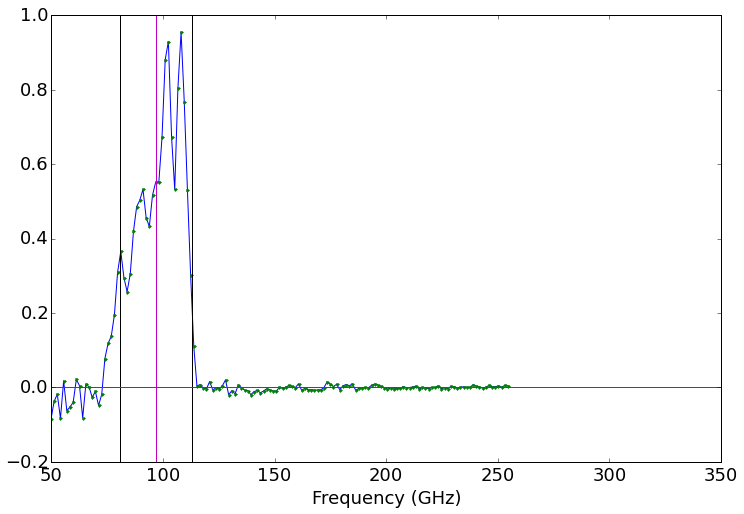

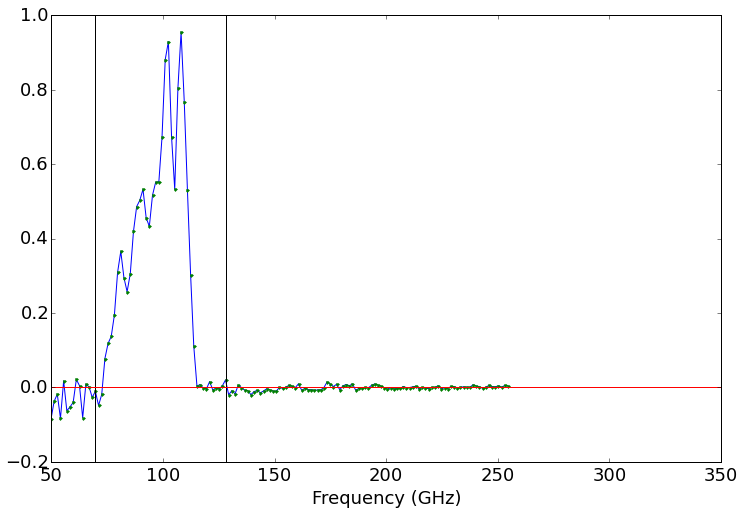

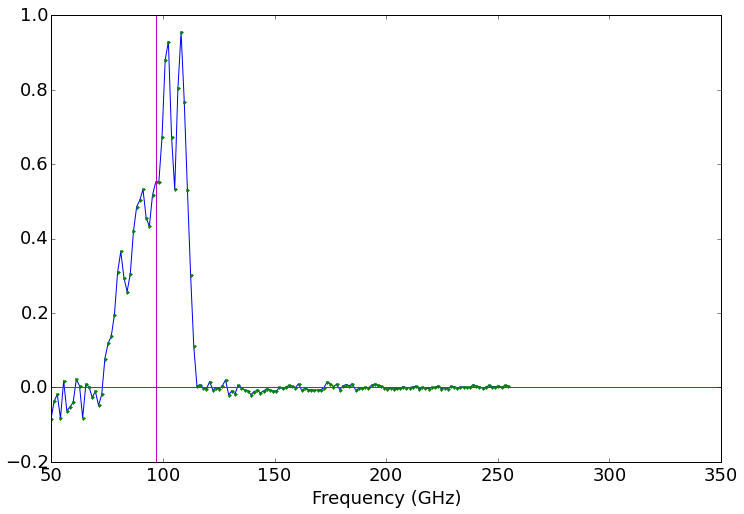

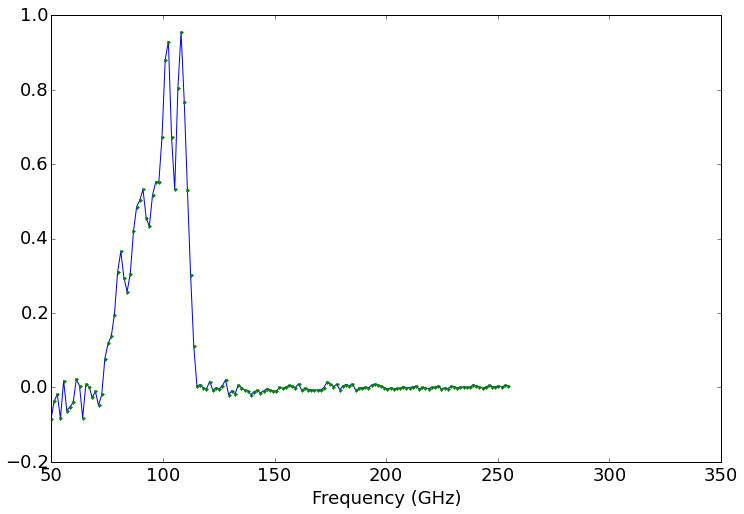

 
 
150 GHz BAND CENTER AVERAGES:


Spectral Index,Weighted Band Center (GHz)
-3.0,144.03
-2.5,144.40
-2.0,144.78
-1.5,145.16
-1.0,145.54
-0.5,145.92
0,146.31
0.5,146.69
1.0,147.08
1.5,147.47


$\nu_{CMB}$,143.77
$f_{SZ}$,-2.81178e+10


150 GHz COLOR CORRECTIONS:


Spectral Index,Color Correction
-3.0,1.055
-2.5,1.049
-2.0,1.042
-1.5,1.033
-1.0,1.023
-0.5,1.012
0,1.000
0.5,0.987
1.0,0.972
1.5,0.957


 
150 GHz DETECTOR BANDWIDTH:
38.8820923903 GHz
 


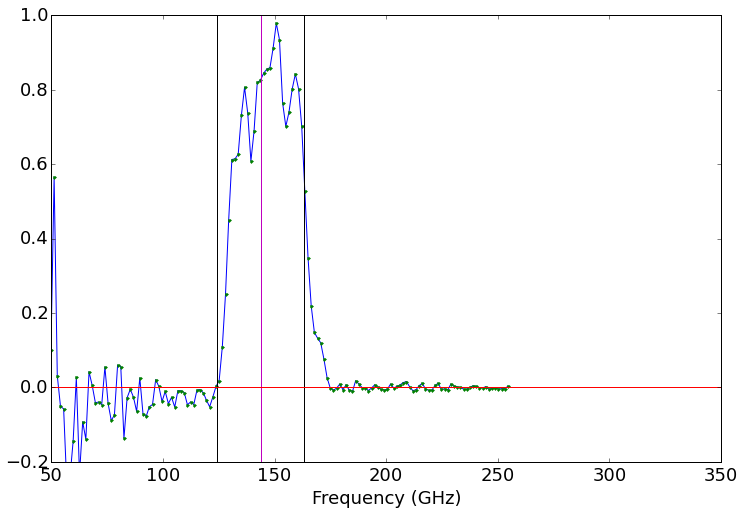

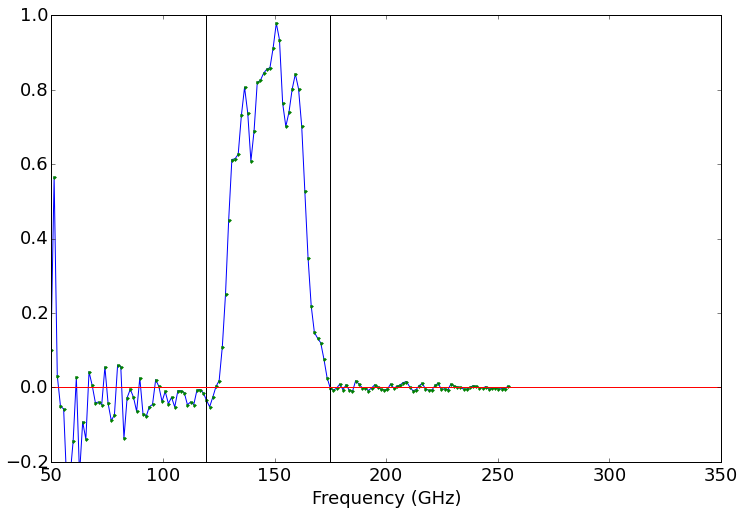

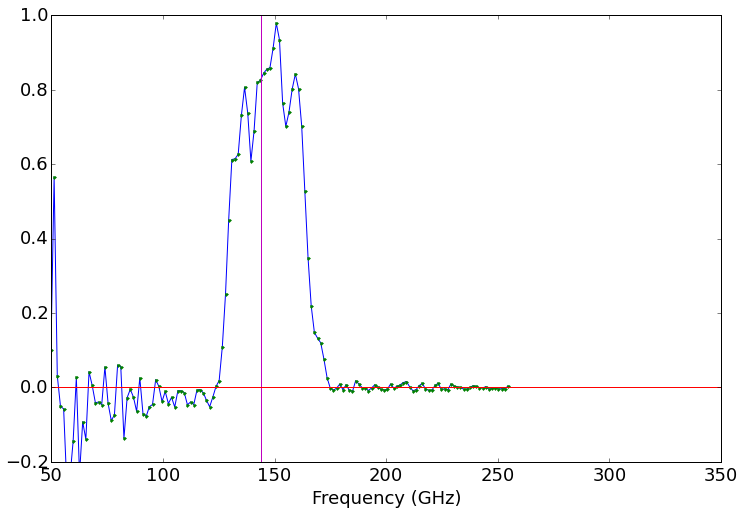

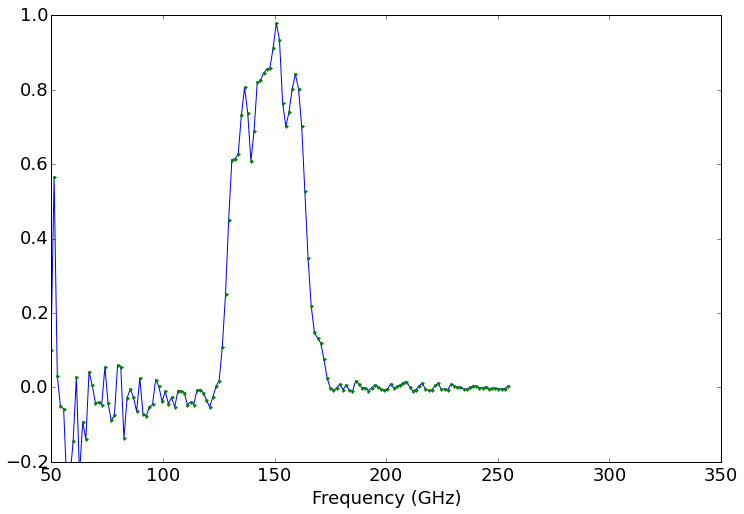

In [18]:
# calculating average bandpass
norm_factor_90 = np.sum(peaks_90)/len(peaks_90)
norm_factor_150 = np.sum(peaks_150)/len(peaks_150)
norm_factor_220 = np.sum(peaks_220)/len(peaks_220)

all_norm_bands_90 = added_90/norm_factor_90
all_norm_bands_150 = added_150/norm_factor_150
all_norm_bands_220 = added_220/norm_factor_220

avg_90,avg_150,avg_220 = avg_bands(all_norm_bands_90,all_norm_bands_150,all_norm_bands_220,N_90,N_150,N_220,N_samps)

    
spectral_indices = [-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0,0.5,1.0,1.5,2.0,2.5,3.0]
    
# calculate weighted band center for each band
centers_90 = eff_cent(avg_90[1:],freq[1:],5e-3,1,spectral_indices)
centers_150 = eff_cent(avg_150[1:],freq[1:],5e-3,2,spectral_indices)
centers_220 = eff_cent(avg_220[1:],freq[1:],5e-3,3,spectral_indices)


avg_band_file_90 = open('Analysis Results Sept 15 2017/data_90.txt','w+')
if np.array(avg_90).all():
    for i in range(len(avg_90[1:])):
        avg_band_file_90.write(str(freq[1:][i]/(1e9))+"\t"+str(avg_90[1:][i])+"\n")
avg_band_file_90.close

avg_band_file_150 = open('Analysis Results Sept 15 2017/data_150.txt','w+')
if np.array(avg_150).all()>0:
    for i in range(len(avg_150[1:])):
        avg_band_file_150.write(str(freq[1:][i]/(1e9))+"\t"+str(avg_150[1:][i])+"\n")
avg_band_file_150.close

avg_band_file_220 = open('Analysis Results Sept 15 2017/data_220.txt','w+')
if np.array(avg_220).all()>0:
    for i in range(len(avg_220[1:])):
        avg_band_file_220.write(str(freq[1:][i]/(1e9))+"\t"+str(avg_220[1:][i])+"\n")
avg_band_file_220.close

plot_average_band(avg_90,centers_90,freq,spectral_indices,'90')
plot_average_band(avg_150,centers_150,freq,spectral_indices,'150')
plot_average_band(avg_220,centers_220,freq,spectral_indices,'220')

## Look at spread of individual channels

Count: 5
 


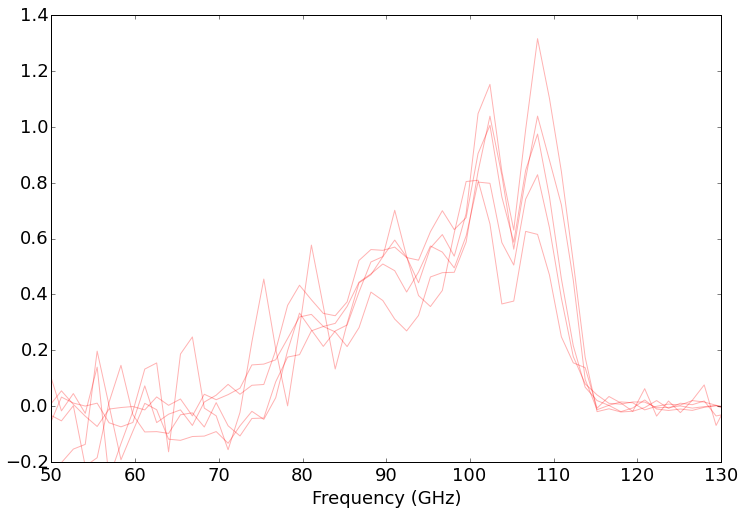

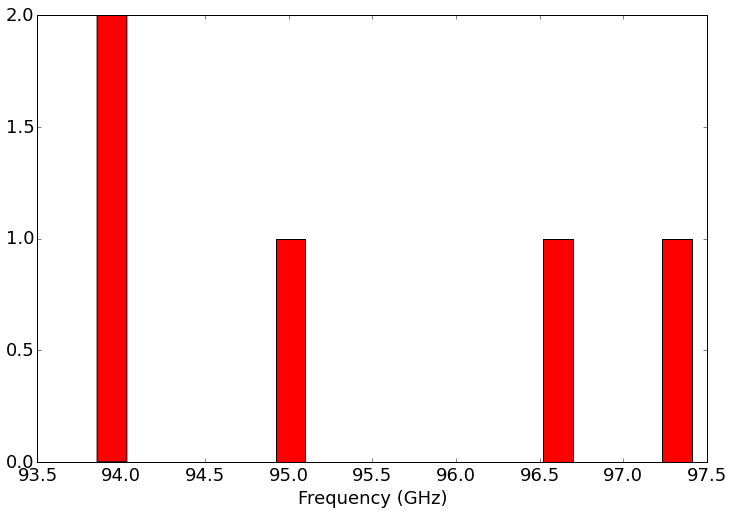

STANDARD DEVIATION: 1.46187769611
VARIANCE: 2.1370863984
Count: 5
 


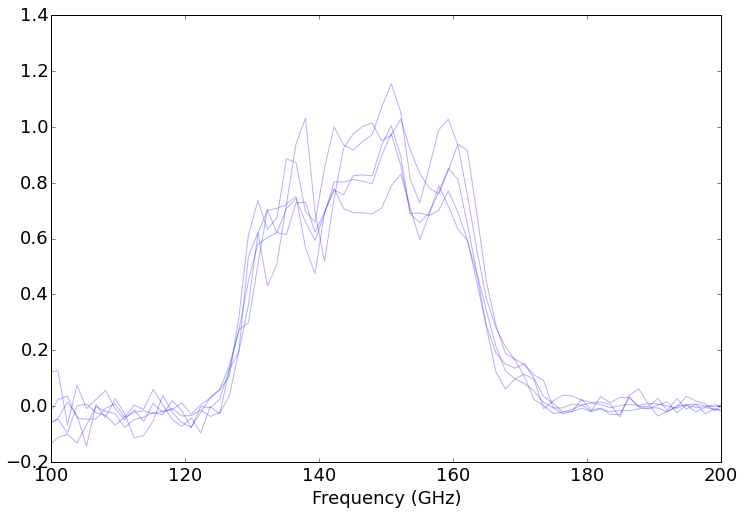

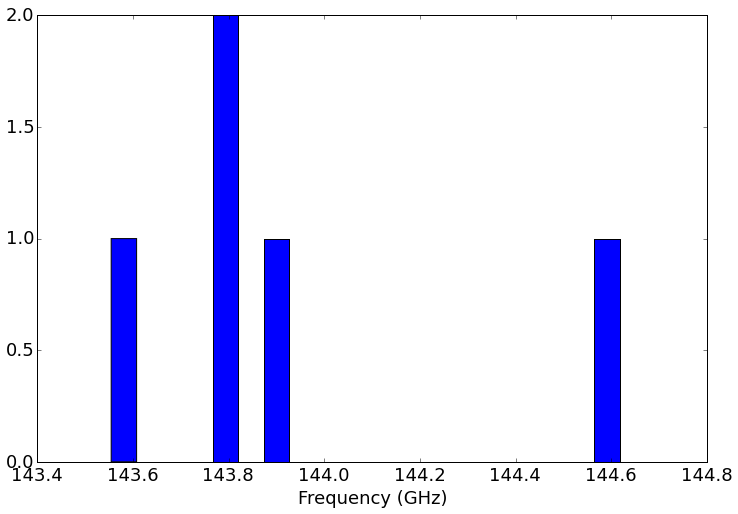

STANDARD DEVIATION: 0.359399157196
VARIANCE: 0.129167754193
Count: 0
 


In [19]:
centers_90 = all_plot(all_norm_bands_90,freq,1,spectral_indices,[50,130],'r')
centers_150 = all_plot(all_norm_bands_150,freq,2,spectral_indices,[100,200],'b')
centers_220 = all_plot(all_norm_bands_220,freq,3,spectral_indices,[150,300],'g')


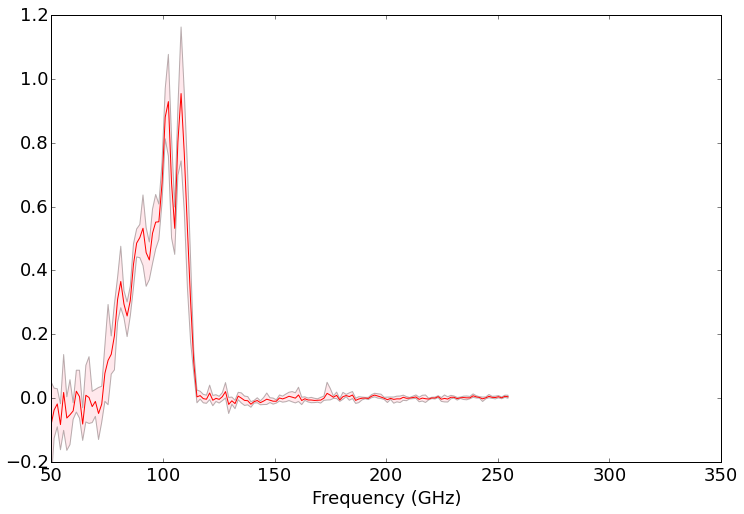

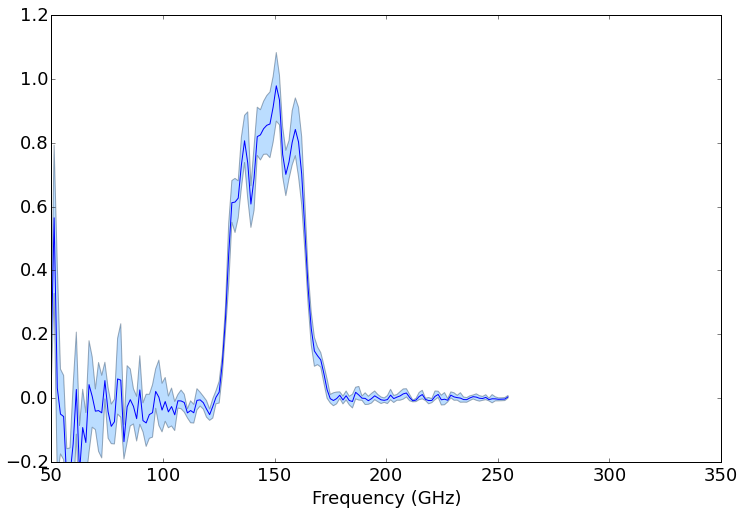

In [20]:
bootstrap_plot(avg_90,all_norm_bands_90,freq,10000,1,'r','lightpink')
bootstrap_plot(avg_150,all_norm_bands_150,freq,10000,2,'b','dodgerblue')
bootstrap_plot(avg_220,all_norm_bands_220,freq,10000,3,'g','mediumseagreen')

IOError: [Errno 2] No such file or directory: 'Analysis Results Sept 15 2017/Channel Plots/90/ch138.png'

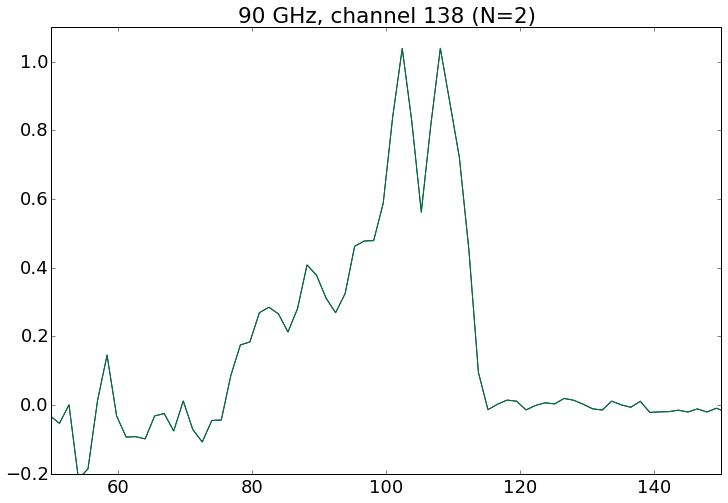

In [21]:
multiple_ch90 = np.sort(list_duplicates(channels_90))
multiple_ch150 = np.sort(list_duplicates(channels_150))
multiple_ch220 = np.sort(list_duplicates(channels_220))

channelcent_90 = channel_plots(multiple_ch90,channels_90,all_norm_bands_90,centers_90,1,freq)
channelcent_150 = channel_plots(multiple_ch150,channels_150,all_norm_bands_150,centers_150,2,freq)
channelcent_220 = channel_plots(multiple_ch220,channels_220,all_norm_bands_220,centers_220,3,freq)

In [22]:
if len(centers_90)>0:
    alpha0_centers_90 = np.transpose(centers_90)[-4]
    channel_file90 = open('Analysis Results Sept 15 2017/channels_centers_90.txt','w+')
    for i in range(len(centers_90)):
        channel_file90.write(str(int(channels_90[i]))+"\t"+str(float(alpha0_centers_90[i]))+"\n")
    channel_file90.close()
if len(centers_150)>0:
    alpha0_centers_150 = np.transpose(centers_150)[-4]
    channel_file150 = open('Analysis Results Sept 15 2017/channels_centers_150.txt','w+')
    for i in range(len(centers_150)):
        channel_file150.write(str(int(channels_150[i]))+"\t"+str(float(alpha0_centers_150[i]))+"\n")
    channel_file150.close()
if len(centers_220)>0:
    alpha0_centers_220 = np.transpose(centers_220)[-4]
    channel_file220 = open('Analysis Results Sept 15 2017/channels_centers_220.txt','w+')
    for i in range(len(centers_220)):
        channel_file220.write(str(int(channels_220[i]))+"\t"+str(float(alpha0_centers_220[i]))+"\n")
    channel_file220.close()
    

    
all_band_write_90 = []
all_band_write_150 = []
all_band_write_220 = []

if len(all_norm_bands_90)>0:
    all_band_file_90 = open('Analysis Results Sept 15 2017/all_bands_90.txt','w+')
    for i in range(len(all_norm_bands_90)):
        all_band_file_90.write(str(int(channels_90[i]))+"\t"+str(list(freq/(1e9)))+"\t"+str(list(list(all_norm_bands_90)[i]))+"\n")
    all_band_file_90.close()
if len(all_norm_bands_150)>0:
    all_band_file_150 = open('Analysis Results Sept 15 2017/all_bands_150.txt','w+')
    for i in range(len(all_norm_bands_150)):
        all_band_file_150.write(str(int(channels_150[i]))+"\t"+str(list(freq/(1e9)))+"\t"+str(list(list(all_norm_bands_150)[i]))+"\n")
    all_band_file_150.close()
if len(all_norm_bands_220)>0:
    all_band_file_220 = open('Analysis Results Sept 15 2017/all_bands_220.txt','w+')
    for i in range(len(all_norm_bands_220)):
        all_band_file_220.write(str(int(channels_220[i]))+"\t"+str(list(freq/(1e9)))+"\t"+str(list(list(all_norm_bands_220)[i]))+"\n")
    all_band_file_220.close()
    
    
unnorm_bands_write_90 = []
unnorm_bands_write_150 = []
unnorm_bands_write_220 = []    
    
if len(added_90)>0:
    unnorm_bands_file_90 = open('Analysis Results Sept 15 2017/unnorm_bands_90.txt','w+')
    for i in range(len(added_90)):
        unnorm_bands_file_90.write(str(int(channels_90[i]))+"\t"+str(list(freq/(1e9)))+"\t"+str(list(list(added_90)[i]))+"\n")
    unnorm_bands_file_90.close()
if len(added_150)>0:
    unnorm_bands_file_150 = open('Analysis Results Sept 15 2017/unnorm_bands_150.txt','w+')
    for i in range(len(added_150)):
        unnorm_bands_file_150.write(str(int(channels_150[i]))+"\t"+str(list(freq/(1e9)))+"\t"+str(list(list(added_150)[i]))+"\n")
    unnorm_bands_file_150.close()
if len(added_220)>0:
    unnorm_bands_file_220 = open('Analysis Results Sept 15 2017/unnorm_bands_220.txt','w+')
    for i in range(len(added_220)):
        unnorm_bands_file_220.write(str(int(channels_220[i]))+"\t"+str(list(freq/(1e9)))+"\t"+str(list(list(added_220)[i]))+"\n")
    unnorm_bands_file_220.close()